<img src="https://i.ibb.co/8j8c78C/C-pia-de-C-pia-de-Web-bootcamp-1.png" width="100%">

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<center>
    <h1><strong>Projeto I</strong></h1>
    <h2>Acidentes de Trânsito em Rodovias Federais </h2>
</center

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **1ª Tarefa**
<hr>

## Importando bibliotecas necessárias para o projeto:

In [1]:
import pandas as pd
import numpy as np

## Baixando os conjuntos de dados de 2019 e 2020 da PRF:

Para que qualquer pessoa consiga ter acesso aos conjuntos de dados, independente da máquina, com o auxilio do fórum presente no <a href="https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url">StackOverflow</a>, criei uma função que tem como parêmetro uma url para o download direto dos dados da PRF, com o objetivo de fazer um requisição GET para baixar os csv e descompactar o arquivo zip que é retornado durante a requisição, além de salvar na mesma pasta do presente Jupyter Notebook.

Importando as bibliotecas necessárias para o download dos arquivos do tipo csv e verificação da presença de arquivo na máquina:

In [2]:
import requests, zipfile, io, os.path

Na função para realizar o download dos arquivos, a variável req, recebe todas as informações retornadas pelo servidor, após realizar a requisição na url recebida como parâmetro. A variável zipCsv recebe o construtor da classe ZipFile que tem como o parâmetro o conteúdo retornado pela requisição http, para que assim, seja possível realizar operções mais sofisticadas, como extrair todos os arquivos presentes no arquivo `.zip`, que no caso é o arquivo `.csv`.

In [3]:
def download_csv(url):
    req = requests.get(url)
    zipCsv = zipfile.ZipFile(io.BytesIO(req.content))
    zipCsv.extractall()

Antes de chamar a função para baixar os conjuntos de dados de 2019 e 2020, utilizei um método da biblioteca "os" do python que permite verificar se já tem o arquivo baixado na mesma pasta do Jupyter Notebook, caso ela retorne "False", é chamada a função criada anteriormente para fazer o download.

In [4]:
url_2019 = "http://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download"

if os.path.isfile("datatran2019.csv") == False:
    download_csv(url_2019)

In [5]:
url_2020 = "http://arquivos.prf.gov.br/arquivos/index.php/s/jdDLrQIf33xXSCe/download"

if os.path.isfile("datatran2020.csv") == False:
    download_csv(url_2020)

## Carregando os conjuntos de dados referentes anos de 2019 e 2020

Ao tentar carregar os conjuntos de dados foram apresentados dois erros, o de codificação, que foi resolvido trocando o valor do parâmetro `encoding` do `read_csv()`  para o padrão `ISO-8859-1`, e um erro de separação de colunas, uma vez que no csv padrão, as informações são separadas utilizando a vírgula e não o ponto e vírgula como está presente no csv da PRF, esse problema foi solucionado através do parâmetro `sep` do `read_csv()`.

In [6]:
#conjunto de dados de 2019
df_2019 = pd.read_csv("datatran2019.csv", sep=";", encoding="ISO-8859-1")
df_2019.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,...,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,...,0,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,...,0,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,...,1,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,...,1,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG


In [7]:
#conjunto de dados de 2020
df_2020 = pd.read_csv("datatran2020.csv", sep=";", encoding="ISO-8859-1")
df_2020.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,...,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **2ª Tarefa** - Explore os conjuntos de dados, respondendo as questões:
<hr>

## (A) Quantos acidentes ocorreram em cada ano?

Para encontrar o número de acidentes por ano, basta pegar o número de linhas de cada DataFrame através do `shape`, tendo em vista que cada linha do conjunto de dados representa um acidente. O `.shape` retorna uma tupla com a quantidade de linhas e colunas do conjunto de dados.

In [8]:
print("Quantidade de acidentes em 2019: ")
df_2019.shape[0]

Quantidade de acidentes em 2019: 


67446

In [9]:
print("Quantidade de acidentes em 2020: ")
df_2020.shape[0]

Quantidade de acidentes em 2020: 


63447

## (B) Quantas variáveis cada conjunto de dados registra?

Para obter a quantidade de variáveis que cada conjunto de dados registra, basta pegarmos a quantidade de colunas no conjunto de dados através atributo `shape`  do DataFrame. O shape retorna uma tupla com a quantidade de linhas e colunas do conjunto de dados.

In [10]:
print("Quantidade de variáveis registradas no conjunto de dados de 2019: ")
df_2019.shape[1]

Quantidade de variáveis registradas no conjunto de dados de 2019: 


30

In [11]:
print("Quantidade de variáveis registradas no conjunto de dados de 2020: ")
df_2020.shape[1]

Quantidade de variáveis registradas no conjunto de dados de 2020: 


30

## (C) Quais as cinco cidades brasileiras onde mais ocorreram acidentes em rodovias federais?

Para encontrar as cinco cidades brasileiras onde ocorreram mais acidentes nos anos de 2019 e 2020 separadamente, primeiramente eu acessei a coluna que contém a cidade de cada acidente, através da indexação por colchetes, e utilizei o método `value_counts()` do Series, método esse que possibilita contar a quantidade de registros com valores iguais e que retorna um Pandas Series ordenado pela quantidade de aparições. Por fim, com o objetivo de mostrar as cinco primeiras cidades com maior número de acidentes, utilizei o método `head()`, e o método `to_frame()` para transformar em DataFrame e melhorar a exibição .

- #### As cinco cidades brasileiras com mais acidentes em 2019:

In [12]:
print("As cinco cidades brasileiras com mais acidentes em 2019 e a quantidade de acidentes:")
df_mais_acidentes_2019 = df_2019["municipio"].value_counts().head().to_frame()
df_mais_acidentes_2019.index.name = "cidade"
df_mais_acidentes_2019.columns =["quantidade"]
df_mais_acidentes_2019

As cinco cidades brasileiras com mais acidentes em 2019 e a quantidade de acidentes:


,quantidade
cidade,
CURITIBA,1094
BRASILIA,1090
SAO JOSE,819
GUARULHOS,717
SERRA,633


- #### As 5 cidades brasileiras com mais acidentes em 2020:

In [13]:
print("As cinco cidades brasileiras com mais acidentes em 2020 e a quantidade de acidentes:")
df_mais_acidentes_2020 = df_2020["municipio"].value_counts().head().to_frame()
df_mais_acidentes_2020.index.name = "cidade"
df_mais_acidentes_2020.columns =["quantidade"]
df_mais_acidentes_2020

As cinco cidades brasileiras com mais acidentes em 2020 e a quantidade de acidentes:


,quantidade
cidade,
BRASILIA,1040
CURITIBA,945
GUARULHOS,639
SAO JOSE,629
PALHOCA,593


## (D) Quantos acidentes com feridos graves aconteceram na Paraíba em 2019?

Para descobrir a quantidade de acidentes com feridos graves que aconteceram na Paraíba em 2019, incialmente utilizei o método `query()` do DataFrame com o objetivo de filtrar as linhas do cojunto de dados que possuem a unidade federativa(uf) igual a sigla da Paraíba e a quantidade de feridos graves diferente de zero, após o filtro, peguei a quantidade de linhas do DataFrame com o filtro.

In [14]:
qtd_acidentes = df_2019.query("uf == 'PB' & feridos_graves != 0").shape[0]
print("----------------------------")
print("Quantidade de acidentes com feridos graves na Paraíba em 2019:", qtd_acidentes)

----------------------------
Quantidade de acidentes com feridos graves na Paraíba em 2019: 414


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **3ª Tarefa** - Para cada indicação abaixo, construa um novo dataframe, salvando-o com a terminação .csv:
<hr>

Como as duas letras da questão pedem dados relacionados ao dois conjuntos de dados juntos, concatenei os dois DataFrames através da função `concat()` do pandas e mandei ignorar o index dos dois DataFrames para não ter repetição.

In [15]:
df_2019_2020 = pd.concat([df_2019, df_2020], ignore_index=True)
df_2019_2020.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,...,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,...,0,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,...,0,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,...,1,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,...,1,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG


## (A) Ranking de acidentes por estado para ambos os anos (um só arquivo combinando a informação dos dois anos);

Para contar a quantidade de acidentes por estado dos dois anos juntos, inicialmente acessei a coluna dos estados no DataFrame que concatena o conjunto de dados dos dois anos através da indexação com colchetes, e utilizei o método `value_counts()` para contar o número de ocorrências.

In [16]:
acidentes_estados = df_2019_2020["uf"].value_counts()

Na célula abaixo, inicialmente transformei o Series em DataFrame, com o objetivo de melhorar a exibição. Por fim, alterei os indexes para simular a ideia de ranking.

In [17]:
novo_df = pd.DataFrame({"uf" : acidentes_estados.index, "quantidade_acidentes": acidentes_estados.values})

novo_df.index.name = "posição"
novo_df.index += 1

novo_df

,uf,quantidade_acidentes
posição,,
1,MG,17083
2,SC,15645
3,PR,14876
4,RJ,8828
5,RS,8771
6,SP,8417
7,BA,6914
8,GO,6580
9,ES,5372


Para salvar o csv na pasta do arquivo jupyter, basta utilizar o método `to_csv()` do DataFrame:

In [18]:
novo_df.to_csv("datatran_estados.csv")

## (B) Acidentes por dia da semana para ambos os anos (um só arquivo combinando a informação dos dois anos).

Para contar a quantidade de acidentes por dia da semana dos dois anos juntos, inicialmente acessei a coluna dos dias da semana no DataFrame que concatena o conjunto de dados dos dois anos através da indexação com colchetes, e utilizei o método `value_counts()` para contar o número de ocorrências.

In [19]:
acidentes_dias = df_2019_2020["dia_semana"].value_counts()

Na célula abaixo, inicialmente transformei o Series em DataFrame, com o objetivo de melhorar a exibição. Por fim, alterei os indexes para simular a ideia de ranking.

In [20]:
novo_df = pd.DataFrame({"dia_semana": acidentes_dias.index, "quantidade_acidentes": acidentes_dias.values })

novo_df.index.name = "posição"
novo_df.index += 1

novo_df

,dia_semana,quantidade_acidentes
posição,,
1,sábado,21744
2,domingo,21706
3,sexta-feira,20131
4,segunda-feira,17638
5,quinta-feira,16981
6,quarta-feira,16516
7,terça-feira,16177


Para salvar o csv na pasta do arquivo jupyter, basta utilizar o método `to_csv()` do DataFrame:

In [21]:
novo_df.to_csv("datatran_dias_semana.csv")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **4ª Tarefa** - Com relação a ocorrência dos acidentes, responda:
<hr>

## (A) qual a causa mais frequente e a mais rara de acidentes registrados nos dois anos?

DataFrame contendo os dados do ano de 2019 e 2020:

In [22]:
df_2019_2020.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,...,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,...,0,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,...,0,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,...,1,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,...,1,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG


Para contar a quantidade de aparições das causas dos acidentes eu acessei a coluna das causas dos acidentes através da indexação com colchetes e utilizei o método `value_counts()` para contar o número de ocorrências.

In [23]:
qtd_causas_acidentes = df_2019_2020["causa_acidente"].value_counts()
df_acidentes = qtd_causas_acidentes.to_frame()
df_acidentes.index.name = "Causa"
df_acidentes.columns = ["Quantidade"]
print("Causas dos acidentes em 2019 e 2020:")
df_acidentes

Causas dos acidentes em 2019 e 2020:


,Quantidade
Causa,
Falta de Atenção à Condução,47406
Desobediência às normas de trânsito pelo condutor,16899
Velocidade Incompatível,11906
Ingestão de Álcool,10489
Não guardar distância de segurança,7821
Defeito Mecânico no Veículo,7475
Condutor Dormindo,4592
Pista Escorregadia,4201
Falta de Atenção do Pedestre,3613


- #### **Causa mais frequente de acidentes registrados nos dois anos**

In [24]:
print("Causa mais frequente de acidentes registrados nos dois anos: ")
# encontrando a maior quantidade de aparições
qtd_max = df_acidentes.values.max()
# filtrando as causas pela quantidade máxima
df_acidentes.query("Quantidade == @qtd_max ")

Causa mais frequente de acidentes registrados nos dois anos: 


,Quantidade
Causa,
Falta de Atenção à Condução,47406


- #### **Causas mais raras de acidentes registrados nos dois anos**

In [25]:
print("Causas mais raras de acidentes registrados nos dois anos: ")
# encontrando a menor quantidade de aparições
qtd_min = df_acidentes.values.min()
# filtrando as causas pela quantidade mínima
df_acidentes.query("Quantidade == @qtd_min")

Causas mais raras de acidentes registrados nos dois anos: 


,Quantidade
Causa,
Acostamento em desnível,1
Acumulo de água sobre o pavimento,1
Pedestre cruzava a pista fora da faixa,1
Frear bruscamente,1
Condutor usando celular,1
Acumulo de óleo sobre o pavimento,1
Ausência de sinalização,1
Trafegar com motocicleta (ou similar) entre as faixas,1
Ingestão de álcool ou de substâncias psicoativas pelo pedestre,1


## (B) Qual a proporção de pessoas ilesas e de feridos graves por mês em cada um dos anos considerados? (proporção = numero de ilesos ou feridos graves/ número total de pessoas envolvidas no acidente);

Lista criada para renomear os indexes dos series que serão criados durante a resolução deste item:

In [26]:
meses = ["janeiro", "fevereiro", "março", "abril", "maio", 
         "junho", "julho", "agosto", "setembro", "outubro","novembro", "dezembro"]

Para obter a quantidade de pessoas envolvidas em acidentes, e a quantidade de pessoas ilesas e com ferimento grave, tanto no ano de 2019, como no ano de 2020, utilizei o método `groupby` da pandas que permite agrupar o DataFrame de acordo com um critério escolhido, nesse caso passei uma Series contendo o fatiamento da "data_inversa" do index 5 e 6 da data, para filtrar as quantidades por mês. Por fim, acessei a coluna através da indexação por colchetes de acordo coluna desejada, e apliquei o método `sum()` para encontrar a quantidade total.

In [44]:
df_mes2019 = df_2019.copy()
df_mes2019["mes"] = df_2019["data_inversa"].apply(lambda x: str(x)[5:7])
df_mes2019

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,mes
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,...,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP,01
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,...,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR,01
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,...,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC,01
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,...,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE,01
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,...,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67441,266255.0,2019-10-07,segunda-feira,09:10:00,ES,101.0,"270,5",SERRA,Falta de Atenção à Condução,Tombamento,...,1,0,1,2,"-20,23107","-40,27387",SR-ES,DEL12/2,UOP01/ES,10
67442,266406.0,2019-11-25,segunda-feira,07:20:00,PR,116.0,125,FAZENDA RIO GRANDE,Falta de Atenção à Condução,Colisão lateral,...,1,1,1,2,"-25,59505","-49,31631",SR-PR,DEL7/1,UOP03/PR,11
67443,266434.0,2019-06-03,segunda-feira,19:00:00,CE,222.0,"1,4",CAUCAIA,Não guardar distância de segurança,Colisão traseira,...,1,0,1,2,"-3,736507","-38,65337",SR-CE,DEL16/1,UOP01/CE,06
67444,266573.0,2019-07-13,sábado,19:35:00,PR,373.0,425,CANDOI,Defeito Mecânico no Veículo,Saída de leito carroçável,...,0,0,1,1,"-25,7118","-52,18374",SR-PR,DEL7/3,UOP02/PR,07


In [47]:
df_mes2019.groupby("mes")["pessoas"].sum()

mes
01    13111
02    11799
03    13569
04    12815
05    12795
06    13411
07    14331
08    13421
09    13682
10    13931
11    13823
12    15585
Name: pessoas, dtype: int64

### **PROPORÇÕES DURANTE OS MESES DE 2019**

- Quantidade de ilesos por mês em 2019

In [28]:
ilesos_mes_2019 = df_2019.groupby(df_2019.data_inversa.str[5:7])["ilesos"].sum()

- Quantidade de pessoas envolvidas em acidentes por mês em 2019

In [29]:
pessoas_mes_2019 = df_2019.groupby(df_2019.data_inversa.str[5:7])["pessoas"].sum()

- Quantidade de feridos graves por mês em 2019

In [30]:
feridos_graves_mes_2019 = df_2019.groupby(df_2019.data_inversa.str[5:7])["feridos_graves"].sum()

- ### **Proporção de Ilesos no ano de 2019 em porcentagem**

In [31]:
proporcao_ilesos_2019 = (ilesos_mes_2019/pessoas_mes_2019)*100

# transformando em DataFrame
proporcao_ilesos_2019 = proporcao_ilesos_2019.to_frame()

#renomeando os indexes de acordo com o mês
proporcao_ilesos_2019.index = meses
proporcao_ilesos_2019.columns = ["proporcao_ilesos"]

proporcao_ilesos_2019

,proporcao_ilesos
janeiro,42.422393
fevereiro,42.410374
março,43.319331
abril,41.568474
maio,41.516217
junho,42.375662
julho,43.681530
agosto,41.308397
setembro,42.106417
outubro,41.892183


- ### **Proporção de Feridos Graves no ano de 2019 em porcentagem**


In [32]:
proporcao_graves_2019 = (feridos_graves_mes_2019/pessoas_mes_2019)*100

# transformando em DataFrame
proporcao_graves_2019 = proporcao_graves_2019.to_frame()

# renomendo os indexes de acordo com o mês
proporcao_graves_2019.index = meses
proporcao_graves_2019.columns = ["proporcao_graves"]

proporcao_graves_2019

,proporcao_graves
janeiro,11.326367
fevereiro,10.678871
março,11.459945
abril,10.596957
maio,12.075029
junho,12.161658
julho,11.667016
agosto,11.668281
setembro,11.065634
outubro,11.980475


### **PROPORÇÕES DURANTE OS MESES DE 2020**

- Quantidade de ilesos por mês em 2020

In [33]:
ilesos_mes_2020 = df_2020.groupby(df_2020.data_inversa.str[5:7])["ilesos"].sum()

- Quantidade de pessoas envolvidas em acidentes por mês em 2020

In [34]:
pessoas_mes_2020 = df_2020.groupby(df_2020.data_inversa.str[5:7])["pessoas"].sum()

- Quantidade de feridos graves por mês em 2020

In [35]:
feridos_graves_mes_2020 = df_2020.groupby(df_2020.data_inversa.str[5:7])["feridos_graves"].sum()

- ### **Proporção de Ilesos no ano de 2020 em porcentagem**

In [36]:
proporcao_ilesos_2020 = (ilesos_mes_2020/pessoas_mes_2020)*100

# transformando em DataFrame
proporcao_ilesos_2020 = proporcao_ilesos_2020.to_frame()

# renomendo os indexes de acordo com o mês
proporcao_ilesos_2020.index = meses
proporcao_ilesos_2020.columns = ["proporcao_ilesos"]

proporcao_ilesos_2020

,proporcao_ilesos
janeiro,41.556503
fevereiro,42.001062
março,40.103973
abril,37.649165
maio,40.127135
junho,42.348550
julho,42.445362
agosto,42.351022
setembro,41.636930
outubro,41.118785


- ### **Proporção de Feridos Graves no ano de 2020 em porcentagem**

In [37]:
# calculando a proporção de feridos graves em porcentagem
proporcao_graves_2020 = (feridos_graves_mes_2020/pessoas_mes_2020)*100

# transformando em DataFrame
proporcao_graves_2020 = proporcao_graves_2020.to_frame()

# renomendo os indexes de acordo com o mês
proporcao_graves_2020.index = meses
proporcao_graves_2020.columns = ["proporcao_ilesos"]

proporcao_graves_2020

,proporcao_ilesos
janeiro,10.746269
fevereiro,11.135553
março,11.242109
abril,11.778043
maio,11.581248
junho,11.589626
julho,10.850112
agosto,11.887188
setembro,11.730317
outubro,11.947514


## (C) Mostre, reorganizando o conjunto de dados, se a pandemia conseguiu diminuir ou não a incidência de acidentes nas rodovias federais.

A fim de analisar se a pandemia conseguiu diminuir ou não a incidência de acidentes nas rodovias federais, inicialmente separei a quantidade de acidentes por mês através do método `groupby()` do Pandas nos dois anos de maneira separada.

- Número de acidentes por mês em 2019

In [38]:
acidentes_mes_2019 = df_2019.groupby(df_2019.data_inversa.str[5:7]).size()
acidentes_mes_2019.index = meses
acidentes_mes_2019

janeiro      5120
fevereiro    4963
março        5593
abril        5436
maio         5473
junho        5578
julho        5794
agosto       5703
setembro     5868
outubro      5881
novembro     5802
dezembro     6235
dtype: int64

- Número de acidentes por mês em 2020

In [39]:
acidentes_mes_2020 = df_2020.groupby(df_2020.data_inversa.str[5:7]).size()
acidentes_mes_2020.index = meses
acidentes_mes_2020

janeiro      5497
fevereiro    5467
março        4789
abril        3880
maio         4653
junho        4731
julho        5124
agosto       5637
setembro     5683
outubro      6109
novembro     5722
dezembro     6155
dtype: int64

Importando biblioteca para plotar gráfico:

In [40]:
import matplotlib.pyplot as plt

Criei uma figura e plotei dois gráficos lado a lado usando o matplotlib, com o objetivo de analisar visualmente a quantidade de acidentes por mês em 2019 e 2020.


<ipython-input-41-ae69767c6a43>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(meses, rotation=45)
<ipython-input-41-ae69767c6a43>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(meses, rotation=45)


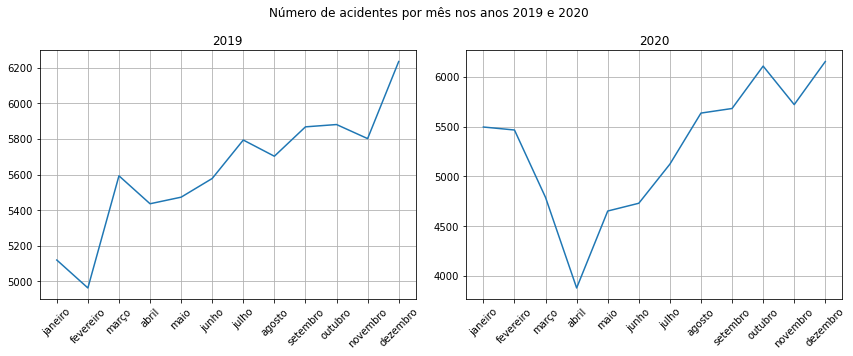

In [41]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle("Número de acidentes por mês nos anos 2019 e 2020")


ax[0].set_title("2019")
ax[0].plot(acidentes_mes_2019.index, acidentes_mes_2019.values)
ax[0].set_xticklabels(meses, rotation=45)
ax[0].grid()


ax[1].set_title("2020")
ax[1].plot(acidentes_mes_2020.index, acidentes_mes_2020.values)
ax[1].set_xticklabels(meses, rotation=45)
ax[1].grid()

fig.tight_layout()

   Analisando os dois gráficos, fica evidente que em fevereiro de 2019 teve uma queda na quantidade de acidentes, e logo após o carnaval, em março, houve um grande esperado aumento, uma vez que as pessoas viajam mais e muitos ainda insistem em dirigir embreagados, por exemplo. Quando estamos diante do gráfico de 2020, é notório que durante o carnaval, dessa vez, em fevereiro, a quantidade de acidentes ficou na mesma faixa. No entano, entre o final de fevereiro e início de março, logo após a identificação do primeiro caso de covid-19 no Brasil, já houve uma queda de em média 800 acidentes, e posteriormente, em abril, uma queda de mais ou menos 1500 acidentes, quando comparado com o ano de 2019. Com a chegada dos meses junho e julho de 2020, muitas cidades já começaram a realizar algumas flexibilizações, fazendo com que houvesse um aumento no número de viagens, e consequentemente, com mais pessoas transitando, a quantidade de acidentes já começaram a aumentar novamente, até que em agosto a diferença fica muito pequena entre os dois anos.

De modo geral, podemos afirmar sim que a pandemia conseguiu diminuir a quantidade de acidentes. No entanto, essa redução só foi significativa durante os meses entre março e julho, como pode ser observado no gráfico abaixo da diferença entre a quantidade de acidentes por mês de 2020 e 2019.

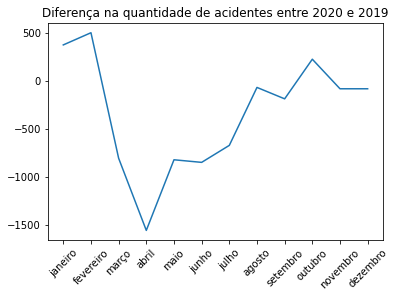

In [42]:
plt.plot(acidentes_mes_2020.index, acidentes_mes_2020.values - acidentes_mes_2019.values)
plt.xticks(rotation=45)
plt.title("Diferença na quantidade de acidentes entre 2020 e 2019")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)